### Plotting graph with points given in file

#### First we need to have file with points
In this example I will just generate it.

In [1]:
File.open('tons_of_data', 'w') do |f|
  (1..100000).each do |x|
    xx = x/1000.0
    yy = Math.exp(Math.sin(xx))
    f.puts "#{xx} #{yy}"
  end
end

1..100000

#### Plot points
Ok, we have file with points so lets plot them:

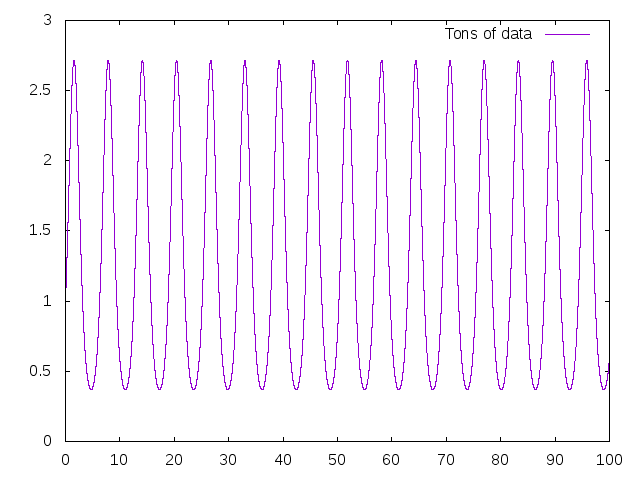

In [2]:
require 'pilot-gnuplot'
include Gnuplot

graph = Plot.new(['tons_of_data', title: 'Tons of data', with: 'lines'])
graph.to_png('tons.png')
File.open('tons.png')

### Plotting graph with points given as array
This example will show how to plot graph from points in polar coordinate system.

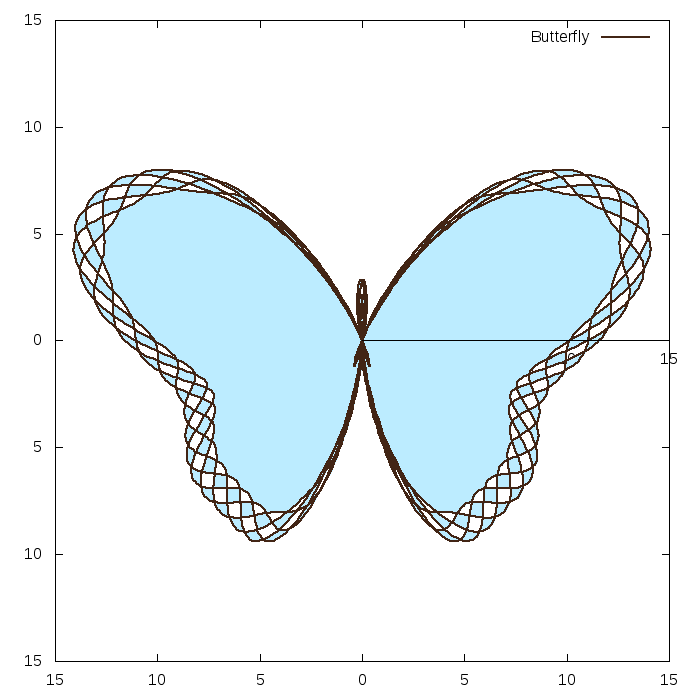

In [3]:
include Math

def butterfly_point(angle)
  8 - 
    1.2 * sin(angle) +
    2 * sin(3 * angle) +
    2 * sin(5 * angle) -
    sin(7 * angle) + 
    0.8 * sin(9 * angle) -
    0.3 * sin(11 * angle) +
    4.8 * cos(2 * angle) -
    2 * cos(4 * angle) +
    0.8 * cos(13.2 * angle)
end

θ = (0.0..10*PI).step(0.01).to_a
r = θ.map { |angle| butterfly_point(angle) }

butterfly = Plot.new(
  [[θ,r], notitle: true, with: 'filledcurve', lt: {rgb: '#BCECFF'}],
  [[θ,r], title: 'Butterfly', with: 'lines', lt: {rgb: '#422515', lw: 2}],
  polar: true
  )
butterfly.to_png('butterfly.png', size: [700,700])
File.open('butterfly.png')